In [1]:
# Insert project token here

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [2]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\wm_herrera\anaconda3\lib\site-packages (0.23.2)


In [3]:
!pip install wget

In [4]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in c:\users\wm_herrera\anaconda3\lib\site-packages (1.2.0)


In [5]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in c:\users\wm_herrera\anaconda3\lib\site-packages (0.0)


<hr>

## Descargar los conjuntos de datos en formato .csv

In [6]:
import pandas as pd

In [7]:

df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,NaN,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


Sobre el archivo "training_dataset.csv", temos alguna información sobre los usuarios de la app de BanCoppel:

**ID**

**Genero**

**Idade**

**Estado_civil**

**Trabajo**

**Sector**

**Telefono**

**Anos_usando_internet_banking**

**Anos_usando_banca_movil**

**Banca_movil_userfriendly**

**Frecuencia_internet_banking_mes**

**Frecuencia_banca_movil_mes**

**Frecuencia_pagamentos_tarjeta_mes**

**Frecuencia_tarjeta_virtual_mes**

**Frecuencia_saldo_cuenta_mes**

**TARGET**

In [8]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 23999 non-null  int64  
 1   Genero                             23110 non-null  object 
 2   Años                               23731 non-null  float64
 3   Estado_civil                       23295 non-null  object 
 4   Trabajo                            21044 non-null  object 
 5   Sector                             23640 non-null  object 
 6   Telefono                           22578 non-null  object 
 7   Anos_usando_internet_banking       23355 non-null  float64
 8   Anos_usando_banca_movil            22698 non-null  float64
 9   Banca_movil_userfriendly           23999 non-null  object 
 10  Frecuencia_internet_banking_mes    21275 non-null  float64
 11  Frecuencia_banca_movil_mes         22728 non-null  flo

In [9]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 23999 non-null  int64  
 1   Genero                             23110 non-null  object 
 2   Años                               23731 non-null  float64
 3   Estado_civil                       23295 non-null  object 
 4   Trabajo                            21044 non-null  object 
 5   Sector                             23640 non-null  object 
 6   Telefono                           22578 non-null  object 
 7   Anos_usando_internet_banking       23355 non-null  float64
 8   Anos_usando_banca_movil            22698 non-null  float64
 9   Banca_movil_userfriendly           23999 non-null  object 
 10  Frecuencia_internet_banking_mes    21275 non-null  float64
 11  Frecuencia_banca_movil_mes         22728 non-null  flo

In [10]:
df_training_dataset.nunique()

ID                                   250
Genero                                 3
Años                                   6
Estado_civil                           2
Trabajo                               31
Sector                                 4
Telefono                              73
Anos_usando_internet_banking           5
Anos_usando_banca_movil                6
Banca_movil_userfriendly               2
Frecuencia_internet_banking_mes        7
Frecuencia_banca_movil_mes             7
Frecuencia_pagamentos_tarjeta_mes      7
Frecuencia_tarjeta_virtual_mes         7
Frecuencia_saldo_cuenta_mes            8
TARGET                                 6
dtype: int64

In [11]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_training_dataset, title="Pandas Profiling Report")
#profile

<hr>

## Desglose del desafío: clasificación multiclase

Este es un desafio cuyo objetivo de negocio es la segmentación de usuario de aplicativos de BanCopp. Podemos utilizar  dos enfoques: Machine Learning supervisado (clasificación) o no supervisado (clustering). En este desafío será usado la clasificación porque el conjunto de datos ya está disponible con "labels", o en otras palabras, ya con la variable objetivo. 

En la biblioteca scikit-learn tenemos diversos algoritmos para clasificación. El participante es libre para utilizar el framework que desee para completar este desafío.

En este notebook será mostrado un ejemplo usando el algoritmo "Decision Tree" para clasificar los estudantes en seis diferentes perfiles.

# ¡Atención!

La columna objetivo de este desafío es la columna ``TARGET``

<hr>

In [12]:
df_training_dataset.columns

Index(['ID', 'Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono',
       'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Banca_movil_userfriendly', 'Frecuencia_internet_banking_mes',
       'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes',
       'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes',
       'TARGET'],
      dtype='object')

In [13]:
df_training_dataset.head()

,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
0,159,M,30.0,Casado,Profesor,Institucion publica,Samsung,0.0,6.0,Si,50.0,0.0,1.0,0.0,30.0,Perfil_2
1,86,F,35.0,Casado,Profesor,Institucion publica,Samsung,5.0,3.0,No,31.0,4.0,31.0,0.0,30.0,Perfil_1
2,83,M,24.0,Soltero,Servidor publico,Institucion publica,LeNovo A7000,0.0,3.0,Si,50.0,31.0,15.0,1.0,15.0,Perfil_4
3,214,M,35.0,Casado,Ingeniero de informacion,Institucion publica,Samsung,5.0,3.0,No,30.0,7.0,30.0,0.0,31.0,Perfil_1
4,31,M,24.0,Soltero,Ingeniero,Institucion publica,Samsung A6,6.0,0.0,No,4.0,NaN,1.0,15.0,1.0,Perfil_3


In [14]:
df_training_dataset=df_training_dataset.drop(columns=['ID'], inplace=False)

In [15]:
df_training_dataset.columns

Index(['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono',
       'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Banca_movil_userfriendly', 'Frecuencia_internet_banking_mes',
       'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes',
       'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes',
       'TARGET'],
      dtype='object')

In [16]:
df_training_dataset.Genero.value_counts()

M    12988
F    10030
0       92
Name: Genero, dtype: int64

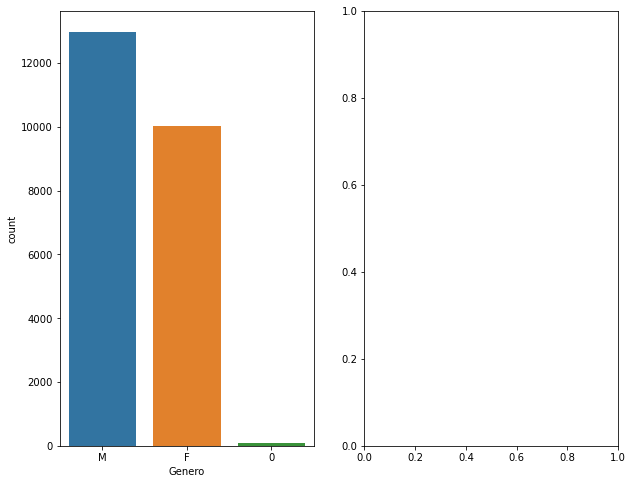

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.countplot(ax=axes[0], x='Genero', data=df_training_dataset)
plt.show()

In [18]:
#reemplazar valores en genero
df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['Genero'])

df_training_dataset.Genero.value_counts()

M    12988
F    10030
0       92
Name: Genero, dtype: int64

In [19]:

df_training_dataset['Genero']=df_training_dataset['Genero'].replace('0', 'None')

values = {'Genero': 'None','Estado_civil': 'None','Trabajo': 'None','Sector': 'None','Telefono': 'None'}
df_training_dataset=df_training_dataset.fillna(value=values)


In [20]:

df_training_dataset.isna().sum()

Genero                                  0
Años                                  256
Estado_civil                            0
Trabajo                                 0
Sector                                  0
Telefono                                0
Anos_usando_internet_banking          616
Anos_usando_banca_movil              1264
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2626
Frecuencia_banca_movil_mes           1228
Frecuencia_pagamentos_tarjeta_mes     272
Frecuencia_tarjeta_virtual_mes        457
Frecuencia_saldo_cuenta_mes           552
TARGET                                  0
dtype: int64

In [21]:
df_training_dataset['Años'] = df_training_dataset['Años'].fillna(int(df_training_dataset['Años'].mean()))
df_training_dataset['Anos_usando_internet_banking'] = df_training_dataset['Anos_usando_internet_banking'].fillna(int(df_training_dataset['Anos_usando_internet_banking'].mean()))
df_training_dataset['Anos_usando_banca_movil'] = df_training_dataset['Anos_usando_banca_movil'].fillna(int(df_training_dataset['Anos_usando_banca_movil'].mean()))
df_training_dataset['Frecuencia_tarjeta_virtual_mes'] = df_training_dataset['Frecuencia_tarjeta_virtual_mes'].fillna(int(df_training_dataset['Frecuencia_tarjeta_virtual_mes'].mean()))
 
    
df_training_dataset['Frecuencia_internet_banking_mes'] = df_training_dataset['Frecuencia_internet_banking_mes'].fillna(int(df_training_dataset['Frecuencia_internet_banking_mes'].median()))
df_training_dataset['Frecuencia_banca_movil_mes'] = df_training_dataset['Frecuencia_banca_movil_mes'].fillna(int(df_training_dataset['Frecuencia_banca_movil_mes'].median()))
df_training_dataset['Frecuencia_pagamentos_tarjeta_mes'] = df_training_dataset['Frecuencia_pagamentos_tarjeta_mes'].fillna(int(df_training_dataset['Frecuencia_pagamentos_tarjeta_mes'].median()))
df_training_dataset['Frecuencia_saldo_cuenta_mes'] = df_training_dataset['Frecuencia_saldo_cuenta_mes'].fillna(int(df_training_dataset['Frecuencia_saldo_cuenta_mes'].median()))

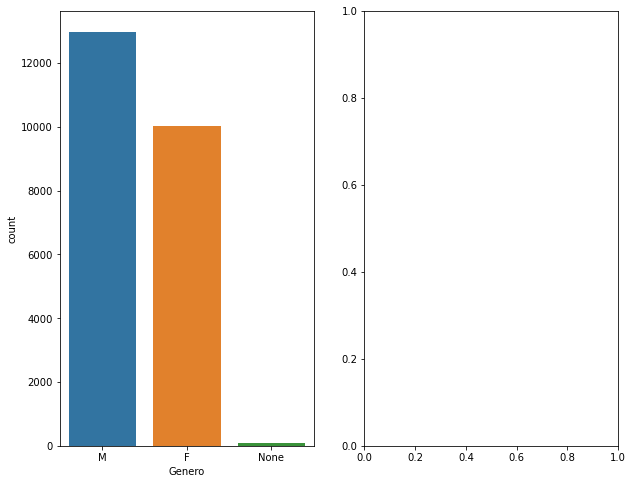

In [22]:
 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.countplot(ax=axes[0], x='Genero', data=df_training_dataset)
plt.show()

## Pre-procesando el dataset antes del entrenamiento

### Removiendo todas las lineas que poseen algun valor nulo en determinadas columnas

Usando el método Pandas **DataFrame.dropna()** usted puede remover todas las lineas nulas del dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [23]:
# Mostrando los datos nulos del dataset antes de la primera transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación DropNA: 

Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
TARGET                               0
dtype: int64



In [24]:
# Aplicando la función para borrar todas las lines con valore NaN en las siguientes columnas:
#df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes', 'TARGET'])

In [25]:
# # Mostrando los datos nulos del dataset despues de la primera transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset despues de la transformación DropNA: 

Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
TARGET                               0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los valores NaN, usaremos a substituición por la constante 0 como **ejemplo**.

Usted puede escoger la estrategía que crea mejor para tratar los valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [26]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='mean'
)

### Eliminando colunas no desadas

Vamos  **demonstrar** abajo como usar el método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

# ¡Atención!

Las columnas removidas anteriores son solo por ejemplo, puede usar las columnas que desee e incluso crear nuevas columnas con datos que crea que son importantes.

### Tratamiento de variables categóricas

Como mencionado antes, los computadores no son buenos con variables "categóricas" (strings).

Dado una columna con variable categórica, lo que podemos realizar es la codificación de esa columna en multiples columnas contiendo variables binárias. Este proceso es llamado "one-hot-encoding" o "dummy encoding". Si usted no esta familiarizado con estos terminos, usted puede buscar mas sobre estos en internet :)

In [27]:
# Tratando variables categóricas con el método Pandas ``get_dummies()''
#df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Banca_movil_userfriendly'])
#df_training.tail()

df=df_training_dataset

In [28]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_training_dataset, title="Pandas Profiling Report")
#profile

In [29]:
top10_gen=[x for x in df.Genero.value_counts().sort_values(ascending=False).head(10).index]
top10_gen

i=0
top10_l_gen=[]
for label in top10_gen:
    i=i+1
    nlabel='gen_'+str(i)
    top10_l_gen.append(nlabel)
    df[nlabel]=np.where(df.Genero==label,1,0) 

df = df.drop(columns=['Genero'], inplace=False)
#df = df.drop(columns=['gen_2'], inplace=False)
#top10_l_gen=['gen_1', 'gen_3']
top10_l_gen



['gen_1', 'gen_2', 'gen_3']

In [30]:
top10_est=[x for x in df.Estado_civil.value_counts().sort_values(ascending=False).head(10).index]
top10_est

i=0
top10_l_est=[]
for label in top10_est:
    i=i+1
    nlabel='est_'+str(i)
    top10_l_est.append(nlabel)
    df[nlabel]=np.where(df.Estado_civil==label,1,0)

df = df.drop(columns=['Estado_civil'], inplace=False)
#df = df.drop(columns=['est_2'], inplace=False)
#top10_l_est=['est_1', 'est_3']
top10_l_est

['est_1', 'est_2', 'est_3']

In [31]:
top10_trab=[x for x in df.Trabajo.value_counts().sort_values(ascending=False).head(10).index]
top10_trab

i=0
top10_l_trab=[]
for label in top10_trab:
    i=i+1
    nlabel='trab_'+str(i)
    top10_l_trab.append(nlabel)
    df[nlabel]=np.where(df.Trabajo==label,1,0)


df = df.drop(columns=['Trabajo'], inplace=False)
top10_l_trab

['trab_1',
 'trab_2',
 'trab_3',
 'trab_4',
 'trab_5',
 'trab_6',
 'trab_7',
 'trab_8',
 'trab_9',
 'trab_10']

In [32]:
top10_sec=[x for x in df.Sector.value_counts().sort_values(ascending=False).head(10).index]
top10_sec

i=0
top10_l_sec=[]
for label in top10_sec:
    i=i+1
    nlabel='sect_'+str(i)
    top10_l_sec.append(nlabel)
    df[nlabel]=np.where(df.Sector==label,1,0)

df = df.drop(columns=['Sector'], inplace=False)
top10_l_sec



#{'', '', 'sect_2', ''

['sect_1', 'sect_2', 'sect_3', 'sect_4', 'sect_5']

In [33]:
top10_tel=[x for x in df.Telefono.value_counts().sort_values(ascending=False).head(10).index]
top10_tel

i=0
top10_l_tel=[]
for label in top10_tel:
    i=i+1
    nlabel='tel_'+str(i)
    top10_l_tel.append(nlabel)
    df[nlabel]=np.where(df.Telefono==label,1,0)


df = df.drop(columns=['Telefono'], inplace=False)
top10_l_tel

['tel_1',
 'tel_2',
 'tel_3',
 'tel_4',
 'tel_5',
 'tel_6',
 'tel_7',
 'tel_8',
 'tel_9',
 'tel_10']

In [34]:
top10_userf=[x for x in df.Banca_movil_userfriendly.value_counts().sort_values(ascending=False).head(10).index]
top10_userf

i=0
top10_l_userf=[]
for label in top10_userf:
    i=i+1
    nlabel='userf_'+str(i)
    top10_l_userf.append(nlabel)
    df[nlabel]=np.where(df.Banca_movil_userfriendly==label,1,0)


df = df.drop(columns=['Banca_movil_userfriendly'], inplace=False)
#df = df.drop(columns=['userf_2'], inplace=False)
#top10_l_userf=['userf_1']
top10_l_userf


['userf_1', 'userf_2']

# ¡Atención!

La columna **TARGET** debe ser mantenida como una string. Usted no necesita procesar/codificar la variable objetivo.

<hr>

## Entrenando un clasificador con base en un árbol de decisión

### Selecionando FEATURES y definiendo la variable TARGET

In [35]:
df_training=df
df_training.columns

Index(['Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'TARGET', 'gen_1', 'gen_2', 'gen_3',
       'est_1', 'est_2', 'est_3', 'trab_1', 'trab_2', 'trab_3', 'trab_4',
       'trab_5', 'trab_6', 'trab_7', 'trab_8', 'trab_9', 'trab_10', 'sect_1',
       'sect_2', 'sect_3', 'sect_4', 'sect_5', 'tel_1', 'tel_2', 'tel_3',
       'tel_4', 'tel_5', 'tel_6', 'tel_7', 'tel_8', 'tel_9', 'tel_10',
       'userf_1', 'userf_2'],
      dtype='object')

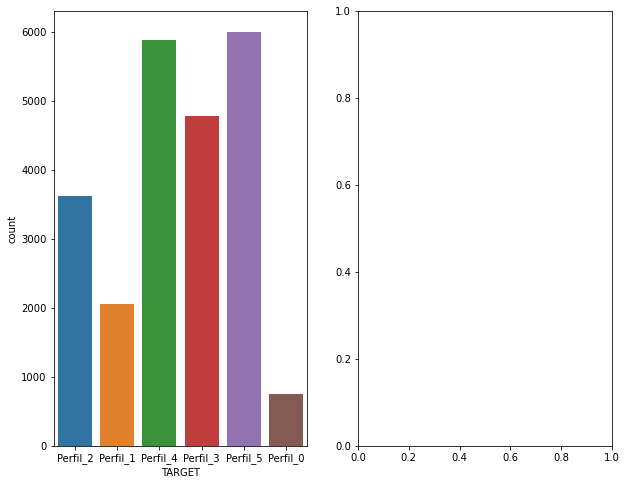

In [36]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.countplot(ax=axes[0], x='TARGET', data=df_training)
plt.show()

In [37]:
count_class_0, count_class_1, count_class_2, count_class_3, count_class_4, count_class_5 = df_training['TARGET'].value_counts()


print(count_class_0);
print(count_class_1);
print(count_class_2);
print(count_class_3);
print(count_class_4);
print(count_class_5);


6007
5892
4787
3620
2058
746


In [38]:
df_class_0 = df_training[df_training['TARGET'] == 'Perfil_0']
df_class_1 = df_training[df_training['TARGET'] == 'Perfil_1']
df_class_2 = df_training[df_training['TARGET'] == 'Perfil_2']
df_class_3 = df_training[df_training['TARGET'] == 'Perfil_3']
df_class_4 = df_training[df_training['TARGET'] == 'Perfil_4']
df_class_5 = df_training[df_training['TARGET'] == 'Perfil_5']


df_class_0_under = df_class_0.sample(count_class_5)
df_class_1_under = df_class_1.sample(count_class_5)
df_class_2_under = df_class_2.sample(count_class_5)
df_class_3_under = df_class_3.sample(count_class_3)
df_class_4_under = df_class_4.sample(count_class_3)
df_class_5_under = df_class_5.sample(count_class_1)

df_test_under = pd.concat([df_class_0, df_class_1,df_class_2,df_class_3,df_class_4,df_class_5_under], axis=0)

print('Random under-sampling:')
print(df_test_under['TARGET'].value_counts())

Random under-sampling:
Perfil_4    5892
Perfil_5    5892
Perfil_3    4787
Perfil_2    3620
Perfil_1    2058
Perfil_0     746
Name: TARGET, dtype: int64


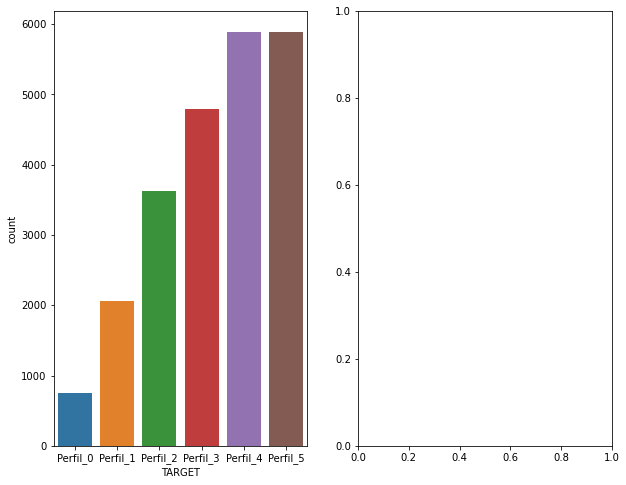

In [39]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

sns.countplot(ax=axes[0], x='TARGET', data=df_test_under)
plt.show()

In [40]:
features = df_training[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes'
    ]
    +top10_l_gen
    +top10_l_est
    +top10_l_trab
    +top10_l_sec
    +top10_l_tel
    +top10_l_userf
]
target = df_training['TARGET']  ## No cambie esta variable

In [41]:
correlated_features = set()
correlation_matrix = df_training.drop('TARGET', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlation_matrix

,Años,Anos_usando_internet_banking,Anos_usando_banca_movil,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,gen_1,gen_2,...,tel_3,tel_4,tel_5,tel_6,tel_7,tel_8,tel_9,tel_10,userf_1,userf_2
Años,1.000000,0.002109,-0.002997,0.000972,0.006357,0.009133,0.010843,-2.132740e-03,0.005880,-0.007051,...,0.007809,0.005950,0.002324,-0.007936,0.005040,0.006814,-0.003431,3.294209e-03,0.002192,-0.002192
Anos_usando_internet_banking,0.002109,1.000000,-0.005924,-0.003208,-0.000542,0.009305,-0.000758,-5.956352e-03,0.008689,-0.007211,...,0.001313,-0.009941,0.000421,0.001919,-0.005385,-0.007137,-0.004577,-9.657198e-03,0.005891,-0.005891
Anos_usando_banca_movil,-0.002997,-0.005924,1.000000,0.003088,-0.004705,-0.005311,0.010264,5.073023e-03,0.006582,-0.006664,...,0.001444,0.004450,-0.007704,-0.004391,0.001571,0.001608,-0.002641,9.564711e-04,-0.006881,0.006881
Frecuencia_internet_banking_mes,0.000972,-0.003208,0.003088,1.000000,-0.002617,0.005437,-0.006418,-1.914668e-03,0.004924,-0.004493,...,-0.008073,-0.000027,0.010020,0.006360,-0.002424,0.006206,0.012387,-2.824921e-03,-0.001785,0.001785
Frecuencia_banca_movil_mes,0.006357,-0.000542,-0.004705,-0.002617,1.000000,-0.005102,0.003735,-7.649186e-03,0.008357,-0.009659,...,0.004509,0.010641,-0.003294,-0.005595,-0.008351,0.001647,0.004092,-8.618799e-03,-0.001780,0.001780
Frecuencia_pagamentos_tarjeta_mes,0.009133,0.009305,-0.005311,0.005437,-0.005102,1.000000,-0.000920,3.318939e-03,0.014099,-0.014043,...,-0.003862,0.001444,0.001460,0.007612,-0.000218,-0.005169,0.002780,1.277640e-03,-0.003904,0.003904
Frecuencia_tarjeta_virtual_mes,0.010843,-0.000758,0.010264,-0.006418,0.003735,-0.000920,1.000000,-1.437393e-03,-0.004864,0.004520,...,-0.005674,-0.007081,0.010656,-0.003714,0.001359,0.005914,-0.000742,5.764822e-04,-0.001033,0.001033
Frecuencia_saldo_cuenta_mes,-0.002133,-0.005956,0.005073,-0.001915,-0.007649,0.003319,-0.001437,1.000000e+00,-0.006098,0.006319,...,0.014302,0.001479,0.002087,0.000154,-0.009486,0.007261,-0.009854,-9.934019e-03,0.005026,-0.005026
gen_1,0.005880,0.008689,0.006582,0.004924,0.008357,0.014099,-0.004864,-6.098169e-03,1.000000,-0.991938,...,-0.002774,-0.002426,-0.000804,0.013115,0.005543,-0.005659,0.004510,-8.855610e-03,0.001871,-0.001871
gen_2,-0.007051,-0.007211,-0.006664,-0.004493,-0.009659,-0.014043,0.004520,6.318767e-03,-0.991938,1.000000,...,0.001837,0.002124,0.001365,-0.013051,-0.005869,0.003226,-0.003348,8.795171e-03,-0.001695,0.001695


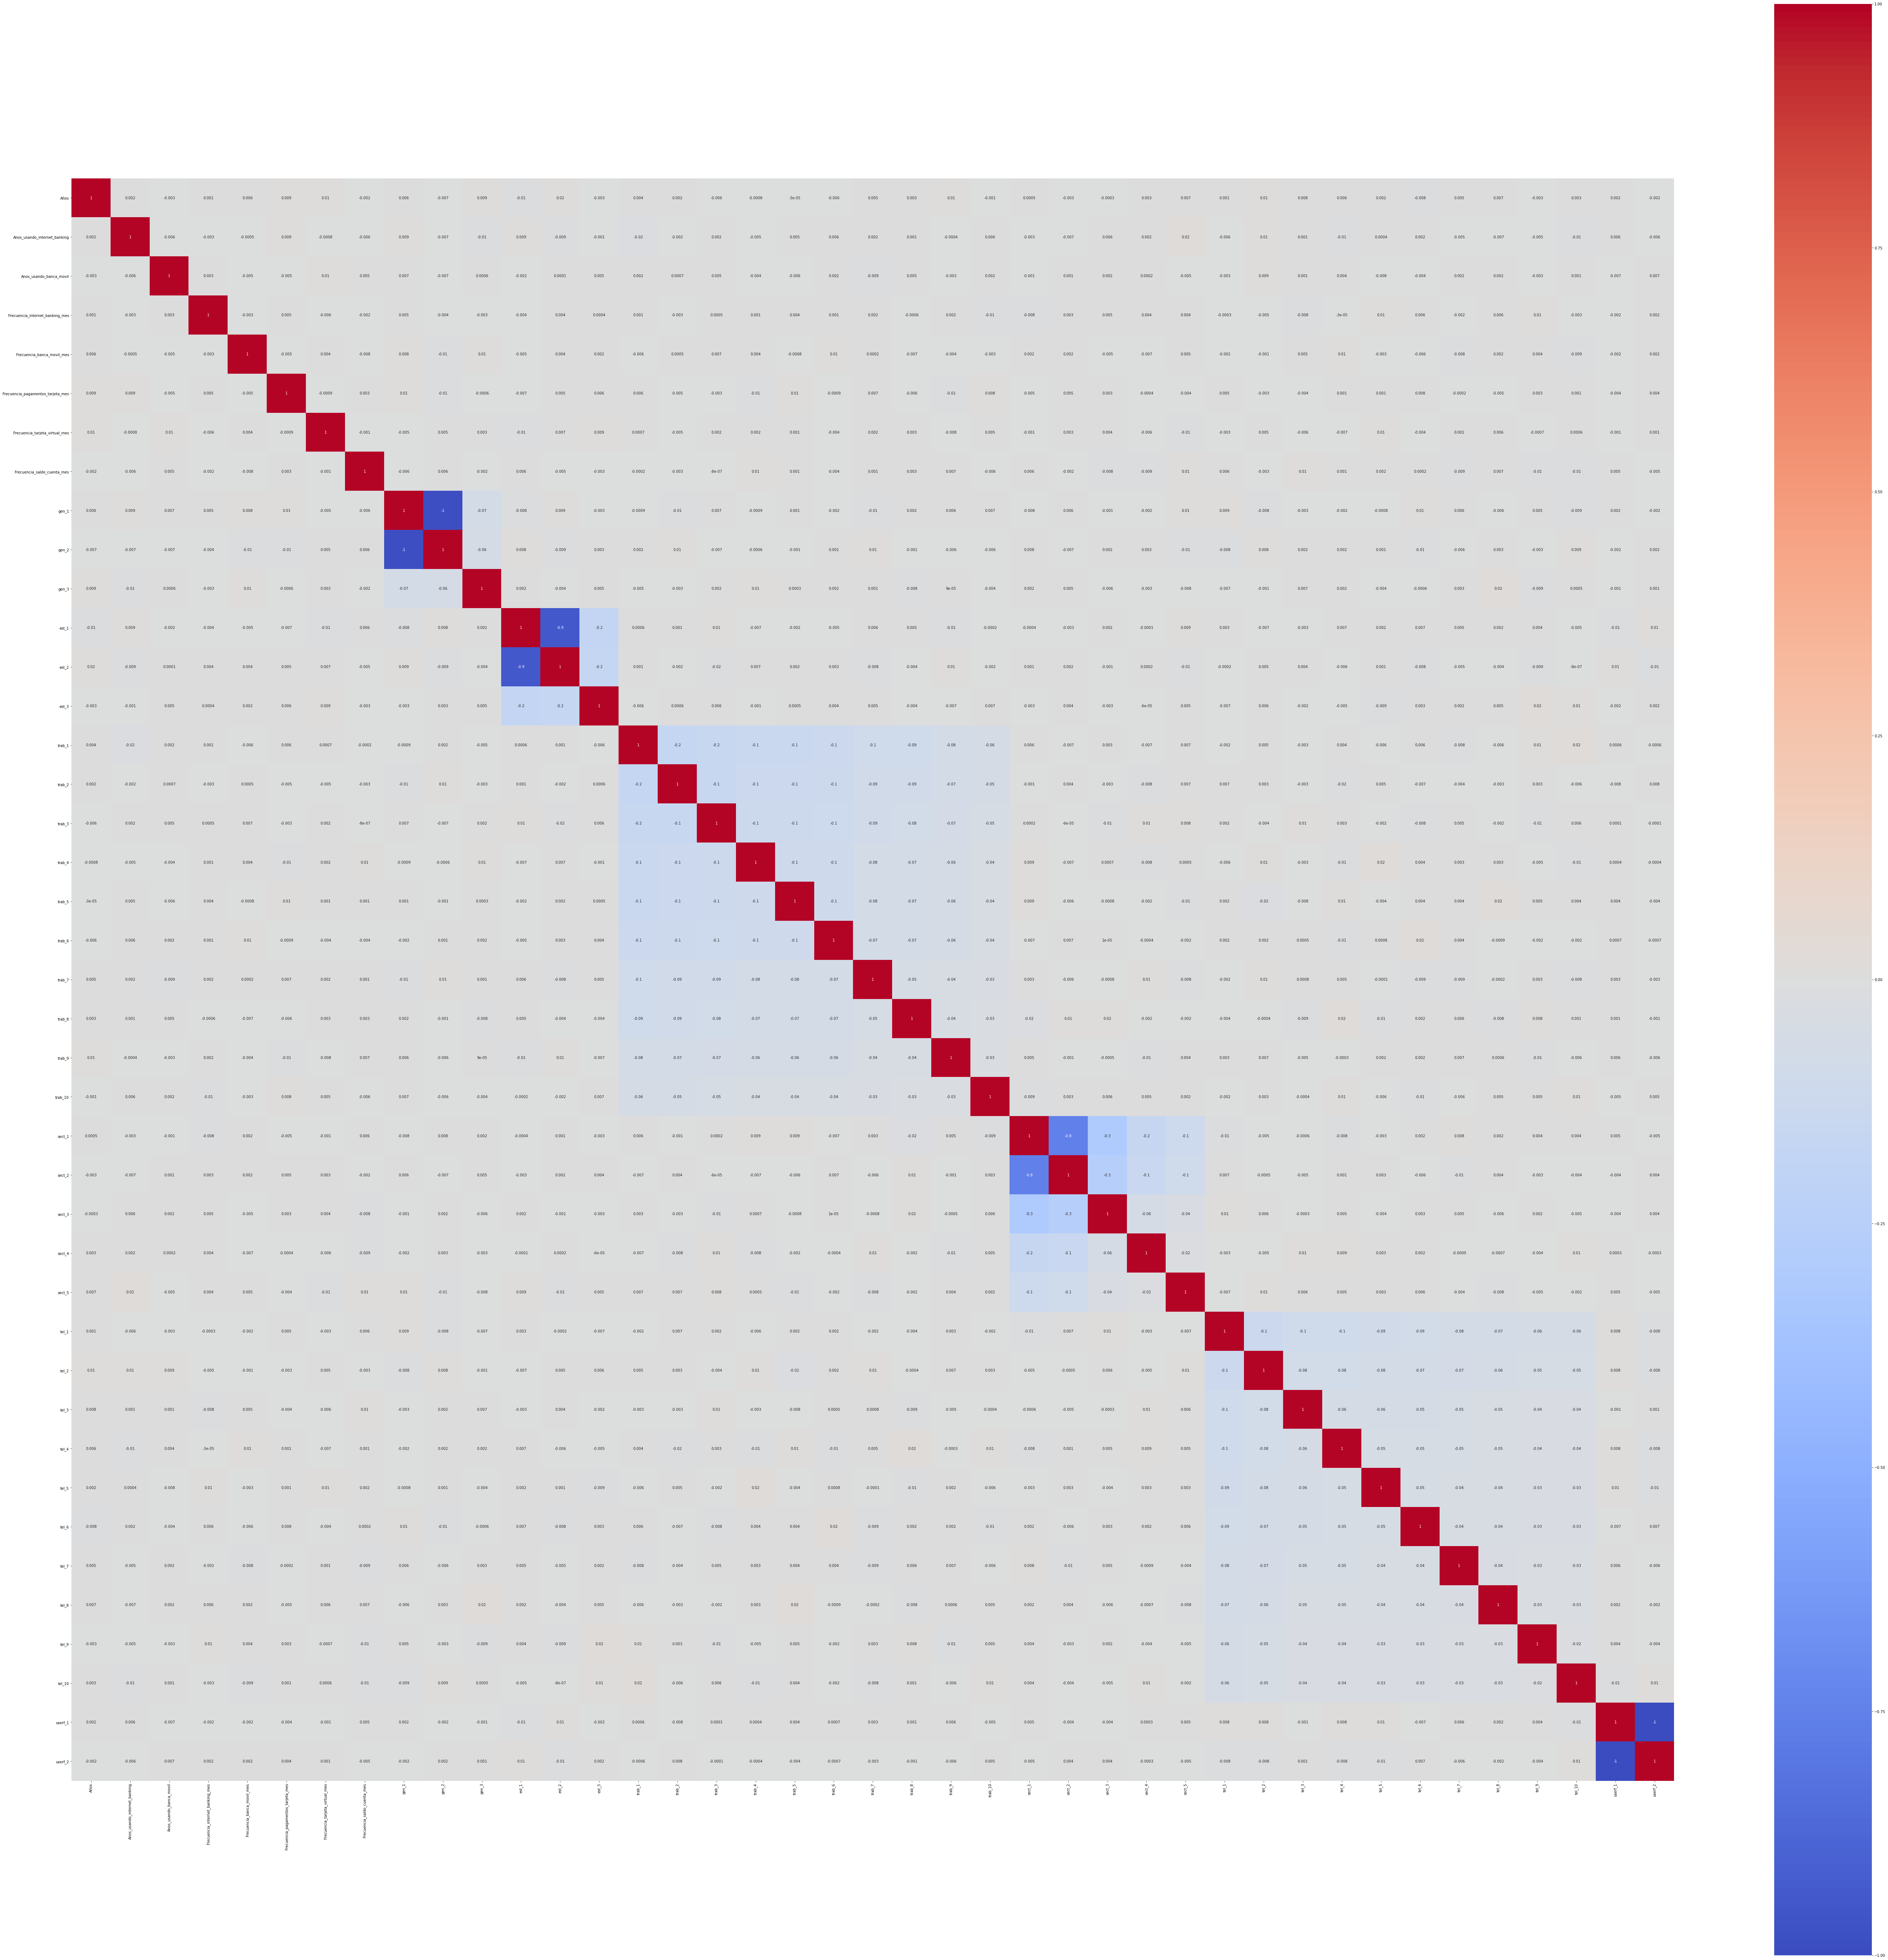

In [42]:
plt.figure(figsize=(100, 100))
sns.heatmap(correlation_matrix, fmt='.1g', vmax=1, square=True, annot=True,cmap='coolwarm')

plt.show()


In [43]:
correlated_features

{'est_2', 'gen_2', 'sect_2', 'userf_2'}

### Dividiendo el conjunto de datos en conjuntos de entrenamiento y pruebas

In [44]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=133)
print(f" x train {len(X_train)} , x test {len(X_test)}")

 x train 16177 , x test 6933


In [45]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)
# transform the dataset
oversample = SMOTE()
#X_train, y_train = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({'Perfil_5': 4163, 'Perfil_4': 4122, 'Perfil_3': 3416, 'Perfil_2': 2495, 'Perfil_1': 1457, 'Perfil_0': 524})
Counter({'Perfil_5': 4163, 'Perfil_4': 4122, 'Perfil_3': 3416, 'Perfil_2': 2495, 'Perfil_1': 1457, 'Perfil_0': 524})


### Entrenando un árbol de decisión

In [46]:

# Método para creacion de modelos basados en arbol de desición
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(max_depth=15).fit(X_train, y_train)


### Haciendo predicciones en la muestra de prueba

In [47]:
predictions = dtc.predict(X_test)

y_pred = predictions

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
print("Exactitud tree : {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))


              precision    recall  f1-score   support

    Perfil_0       0.38      0.37      0.38       222
    Perfil_1       0.59      0.56      0.57       601
    Perfil_2       0.65      0.61      0.63      1125
    Perfil_3       0.63      0.66      0.64      1371
    Perfil_4       0.65      0.75      0.70      1770
    Perfil_5       0.45      0.39      0.42      1844

    accuracy                           0.59      6933
   macro avg       0.56      0.56      0.56      6933
weighted avg       0.58      0.59      0.58      6933

Exactitud tree : 58.675900000000006%


In [48]:
y_pred

array(['Perfil_4', 'Perfil_4', 'Perfil_5', ..., 'Perfil_5', 'Perfil_4',
       'Perfil_2'], dtype=object)

### Analizando la calidad del modelo a través de la matriz de confusión

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

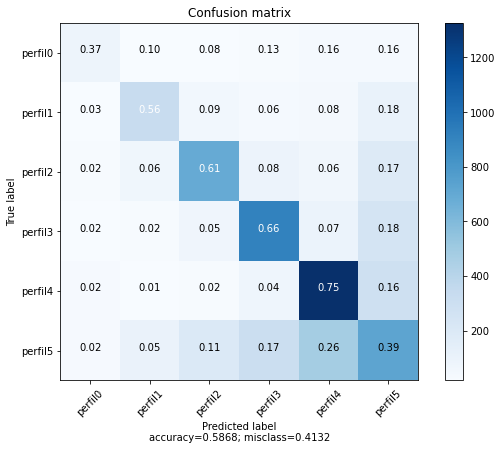

In [50]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

              precision    recall  f1-score   support

    Perfil_0       0.63      0.35      0.45       222
    Perfil_1       0.71      0.68      0.69       601
    Perfil_2       0.71      0.71      0.71      1125
    Perfil_3       0.68      0.72      0.70      1371
    Perfil_4       0.70      0.80      0.75      1770
    Perfil_5       0.54      0.48      0.51      1844

    accuracy                           0.66      6933
   macro avg       0.66      0.62      0.64      6933
weighted avg       0.65      0.66      0.65      6933

Exactitud GradientBoostingClassifier tunning: 66.00319999999999%


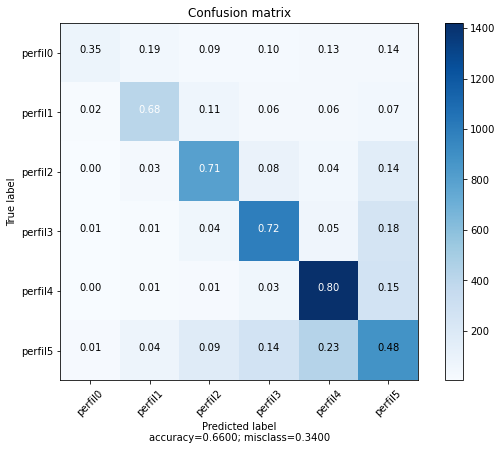

In [51]:


x_train=X_train
x_test=X_test
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier
dtc=GradientBoostingClassifier(max_depth=7)
dtc.fit(x_train, y_train)
predictions = dtc.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

print("Exactitud GradientBoostingClassifier tunning: {}%".format(100*round(accuracy_score(y_test, predictions), 6)))

from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

              precision    recall  f1-score   support

    Perfil_0       0.68      0.36      0.48       222
    Perfil_1       0.70      0.69      0.70       601
    Perfil_2       0.71      0.70      0.70      1125
    Perfil_3       0.68      0.73      0.70      1371
    Perfil_4       0.70      0.81      0.75      1770
    Perfil_5       0.55      0.48      0.51      1844

    accuracy                           0.66      6933
   macro avg       0.67      0.63      0.64      6933
weighted avg       0.66      0.66      0.66      6933

Exactitud OneVsRestClassifier GradientBoostingClassifier: 66.3493%


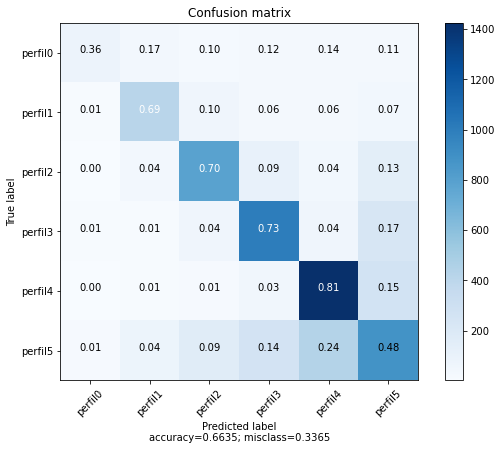

In [52]:

x_train=X_train
x_test=X_test 



from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(GradientBoostingClassifier(max_depth=8))
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

y_pred = predictions
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Exactitud OneVsRestClassifier GradientBoostingClassifier: {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))

plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

              precision    recall  f1-score   support

    Perfil_0       0.68      0.36      0.48       222
    Perfil_1       0.70      0.69      0.70       601
    Perfil_2       0.71      0.70      0.70      1125
    Perfil_3       0.68      0.73      0.70      1371
    Perfil_4       0.70      0.81      0.75      1770
    Perfil_5       0.55      0.48      0.51      1844

    accuracy                           0.66      6933
   macro avg       0.67      0.63      0.64      6933
weighted avg       0.66      0.66      0.66      6933

Exactitud OneVsRestClassifier MultiLabelBinarizer: 66.3493%


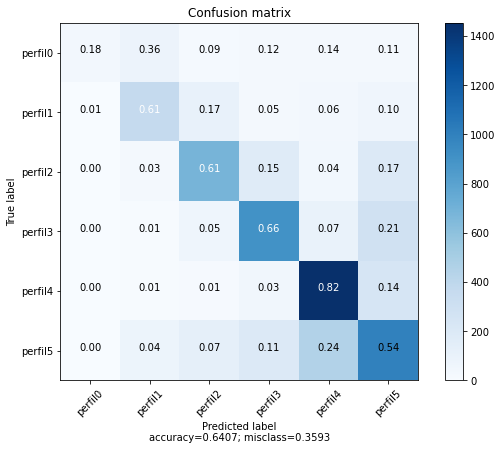

In [53]:
from sklearn.ensemble import RandomForestClassifier
x_train=X_train
x_test=X_test 

from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier 
from sklearn.preprocessing import MultiLabelBinarizer

clf = OneVsRestClassifier(RandomForestClassifier(max_depth=18,n_estimators=450))


clf.fit(x_train, y_train)

predictions = clf.predict(x_test) 
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Exactitud OneVsRestClassifier MultiLabelBinarizer: {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))

plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

In [54]:
!pip install BorutaShap

In [55]:
hg

NameError: name 'hg' is not defined

In [59]:
model =RandomForestClassifier(max_depth=18,n_estimators=450)

from BorutaShap import BorutaShap
# if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)


# no model selected default is Random Forest, if classification is True it is a Classification problem
#Feature_Selector = BorutaShap(importance_measure='shap',
#                              classification=True)

Feature_Selector.fit(X=x_train, y=y_train, n_trials=2, random_state=0)


100%|███████████████████████████████████████████████████████████████████████████████| 2/2 [5:54:21<00:00, 10630.91s/it]

0 attributes confirmed important: []
0 attributes confirmed unimportant: []
41 tentative attributes remains: ['est_3', 'gen_2', 'trab_3', 'tel_8', 'trab_6', 'est_2', 'sect_1', 'Frecuencia_internet_banking_mes', 'Anos_usando_internet_banking', 'tel_2', 'tel_7', 'Frecuencia_saldo_cuenta_mes', 'sect_2', 'trab_7', 'tel_10', 'sect_4', 'trab_4', 'tel_3', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_banca_movil_mes', 'tel_6', 'trab_9', 'userf_1', 'userf_2', 'gen_3', 'trab_2', 'trab_1', 'Anos_usando_banca_movil', 'trab_10', 'est_1', 'sect_3', 'trab_8', 'Años', 'tel_1', 'tel_4', 'gen_1', 'sect_5', 'trab_5', 'tel_5', 'Frecuencia_pagamentos_tarjeta_mes', 'tel_9']


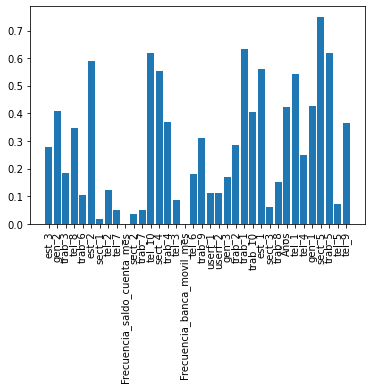

In [70]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

predictors = ['est_3', 'gen_2', 'trab_3', 'tel_8', 'trab_6', 'est_2', 'sect_1', 'tel_2', 'tel_7', 'Frecuencia_saldo_cuenta_mes', 'sect_2', 'trab_7', 'tel_10', 'sect_4', 'trab_4', 'tel_3', 'Frecuencia_banca_movil_mes', 'tel_6', 'trab_9', 'userf_1', 'userf_2', 'gen_3', 'trab_2', 'trab_1', 'trab_10', 'est_1', 'sect_3', 'trab_8', 'Años', 'tel_1', 'tel_4', 'gen_1', 'sect_5', 'trab_5', 'tel_5', 'tel_9']

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(df_training[predictors], df_training["TARGET"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [ ]:

# Returns Boxplot of features
Feature_Selector.plot(which_features='all', 
                      X_size=8, figsize=(12,8),
                      y_scale='log')

              precision    recall  f1-score   support

    Perfil_0       0.84      0.18      0.30       222
    Perfil_1       0.63      0.61      0.62       601
    Perfil_2       0.68      0.64      0.66      1125
    Perfil_3       0.67      0.70      0.68      1371
    Perfil_4       0.68      0.84      0.75      1770
    Perfil_5       0.56      0.49      0.52      1844

    accuracy                           0.65      6933
   macro avg       0.68      0.58      0.59      6933
weighted avg       0.65      0.65      0.64      6933

Exactitud RandomForestClassifier : 64.5752%


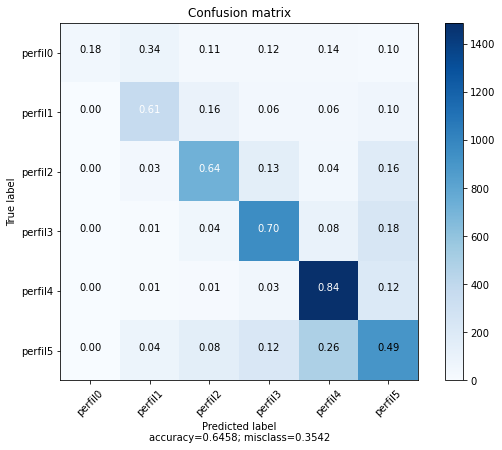

Feature: 0, Score: 0.05640
Feature: 1, Score: 0.04917
Feature: 2, Score: 0.04615
Feature: 3, Score: 0.14500
Feature: 4, Score: 0.13116
Feature: 5, Score: 0.07032
Feature: 6, Score: 0.05041
Feature: 7, Score: 0.09619
Feature: 8, Score: 0.01605
Feature: 9, Score: 0.01604
Feature: 10, Score: 0.00109
Feature: 11, Score: 0.01811
Feature: 12, Score: 0.01801
Feature: 13, Score: 0.00521
Feature: 14, Score: 0.01483
Feature: 15, Score: 0.01434
Feature: 16, Score: 0.01322
Feature: 17, Score: 0.01189
Feature: 18, Score: 0.01164
Feature: 19, Score: 0.01129
Feature: 20, Score: 0.00780
Feature: 21, Score: 0.00812
Feature: 22, Score: 0.00585
Feature: 23, Score: 0.00417
Feature: 24, Score: 0.01906
Feature: 25, Score: 0.01899
Feature: 26, Score: 0.01104
Feature: 27, Score: 0.00546
Feature: 28, Score: 0.00355
Feature: 29, Score: 0.01512
Feature: 30, Score: 0.01286
Feature: 31, Score: 0.00946
Feature: 32, Score: 0.00921
Feature: 33, Score: 0.00829
Feature: 34, Score: 0.00804
Feature: 35, Score: 0.00653
Fe

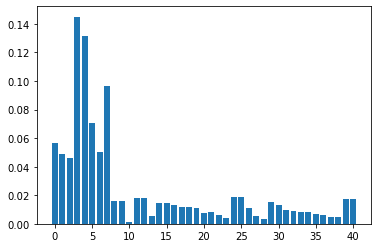

Features sorted by their score:
[(0.145, 'Frecuencia_internet_banking_mes'), (0.1312, 'Frecuencia_banca_movil_mes'), (0.0962, 'Frecuencia_saldo_cuenta_mes'), (0.0703, 'Frecuencia_pagamentos_tarjeta_mes'), (0.0564, 'Años'), (0.0504, 'Frecuencia_tarjeta_virtual_mes'), (0.0492, 'Anos_usando_internet_banking'), (0.0462, 'Anos_usando_banca_movil'), (0.0191, 'sect_1'), (0.019, 'sect_2'), (0.0181, 'est_1'), (0.018, 'est_2'), (0.0173, 'userf_2'), (0.0173, 'userf_1'), (0.016, 'gen_2'), (0.016, 'gen_1'), (0.0151, 'tel_1'), (0.0148, 'trab_1'), (0.0143, 'trab_2'), (0.0132, 'trab_3'), (0.0129, 'tel_2'), (0.0119, 'trab_4'), (0.0116, 'trab_5'), (0.0113, 'trab_6'), (0.011, 'sect_3'), (0.0095, 'tel_3'), (0.0092, 'tel_4'), (0.0083, 'tel_5'), (0.0081, 'trab_8'), (0.008, 'tel_6'), (0.0078, 'trab_7'), (0.0065, 'tel_7'), (0.0062, 'tel_8'), (0.0059, 'trab_9'), (0.0055, 'sect_4'), (0.0052, 'est_3'), (0.0047, 'tel_9'), (0.0045, 'tel_10'), (0.0042, 'trab_10'), (0.0035, 'sect_5'), (0.0011, 'gen_3')]


In [58]:

x_train=X_train
x_test=X_test 

from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(max_depth=18,n_estimators=450)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

print("Exactitud RandomForestClassifier : {}%".format(100*round(accuracy_score(y_test, predictions), 6)))

from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])


# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), features), reverse=True))

In [ ]:

x_train=X_train
x_test=X_test 


from xgboost import XGBClassifier

clf =XGBClassifier(objective='multi:softmax',num_class=6,max_depth=4)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

y_pred = predictions
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Exactitud XGBClassifier: {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))


from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])





In [ ]:

x_train=X_train
x_test=X_test 

from xgboost import XGBClassifier


from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(XGBClassifier(objective='multi:softmax',num_class=6,max_depth=4))
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

y_pred = predictions
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Exactitud XGBClassifier: {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))

plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])



In [ ]:


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
sc = PowerTransformer(method='yeo-johnson')
sc=PowerTransformer(method='box-cox')
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
 

sc = MinMaxScaler() #81.2%
sc =Normalizer() # 80.0%
sc = QuantileTransformer(output_distribution='uniform') #82.0%
sc = QuantileTransformer(output_distribution='normal') #80.8% no converge
sc = PowerTransformer(method='yeo-johnson') #81.8



sc = RobustScaler(quantile_range=(25, 75)) #80.60 no converge
 #80.6 no converge
sc = MaxAbsScaler() #81.2


 #82.0%

sc = MinMaxScaler()
sc = StandardScaler() 
sc = PowerTransformer(method='yeo-johnson')

sc = QuantileTransformer(output_distribution='uniform')
sc = StandardScaler() 
X_train_t=sc.fit_transform(X_train)
X_test_t=sc.transform(X_test) 

x_train=X_train_t
x_test=X_test_t 


from sklearn import svm

clf = svm.LinearSVC(multi_class = "crammer_singer")
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

y_pred = predictions
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Exactitud SVC: {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

In [ ]:
sc = StandardScaler() 
X_train_t=sc.fit_transform(X_train)
X_test_t=sc.transform(X_test) 

x_train=X_train_t
x_test=X_test_t 

# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = LogisticRegression(solver='newton-cg')
# define the ovr strategy
clf = OneVsRestClassifier(model)
# fit model
clf.fit(x_train, y_train)
# make predictions
yhat = ovr.predict(X)
predictions = clf.predict(x_test)

y_pred = predictions
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Exactitud SVC: {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, predictions), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

In [ ]:
sc = StandardScaler() 
X_train_t=sc.fit_transform(X_train)
X_test_t=sc.transform(X_test) 

x_train=X_train
x_test=X_test 

from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
dnns_classifier.fit(np.array(x_train), y_train)
dnns_predictions_labels = dnns_classifier.predict(x_test)

y_pred = predictions
 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print("Exactitud MLPClassifier: {}%".format(100*round(accuracy_score(y_test, y_pred), 6)))

<hr>

## Scoring de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos los resultados clasificados del seguiente dataset llamado "to_be_scored.csv":

### Download la "Hoja de evaluación"

In [ ]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

# ¡Atención!

El dataframe ``to_be_scored`` en su "hoja de evaluación". Note que la columna "categoria" no existe en esta muetra, por lo que no puede ser utilizada para entrenar modelos supervisados

In [ ]:
df_to_be_scored.info()

<hr>

# ¡Atención!

# Para poder aplicar su modelo y clasificar la hoja de evaluación, usted debe aplicar primero todas las transformaciones de columna que usted aplico en el dataset de entrenamiento.

# No remueva o adicione filas en la hoja de evaluación. 

# No altere el orden de las filas en la hoja de evaluación. 

# Al final, las 1000 entradas deben estar clasificadas, con los valores calculados en una columna llamada "target"

<hr>

En la celda de abajo, repetimos rapidamente los mismos pasos de pré-procesamiento usados en el ejemplo dado con árbol de decisión

In [ ]:
# 1 - Removiendo filas con valores NaN 
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes'])

# 2 - Reemplazando con ceros los valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoción de columnas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['ID', 'Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono'], inplace=False)

# 4 - Encoding con "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Banca_movil_userfriendly'])

df_to_be_scored_4.tail()

<hr>

Puede verificar abajo que las columnas de la hoja de evaluación son identicas a las usadas para entrenar el modelo:

In [ ]:
df_training[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atención

Para todas las columnas que no existiren en "df_to_be_scored", usted puede usar la tecnica de abajo para adicionarla:

In [ ]:
df_to_be_scored_4['Banca_movil_userfriendly_No'] = 0

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Guardando la hoja de evaluacion como un archivo .csv para ser enviado
**SI YA TIENE UN DATA ASSET CON EL NOMBRE results.csv EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# ATENCIÓN

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con results.csv y notebook.ipynb para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!
Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://bancoppel.maratona.dev
